In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

import missingno as msno
import pandas_profiling

from sklearn.datasets import make_blobs
import time

In [3]:
df = pd.read_csv('../../data/india-election/parliament.csv')

In [4]:
df.shape

(74930, 11)

In [5]:
df.head()

,YEAR,STATE,PC,NAME,SEX,PARTY,AGE,CATEGORY,VOTES,ELECTORS,#
0,1951,AJMER,AJMER NORTH,JAWALA PRASHAD,NaN,INC,NaN,NaN,46679,162327.0,1
1,1951,AJMER,AJMER NORTH,CHAND KARAN,NaN,BJS,NaN,NaN,28990,162327.0,2
2,1951,AJMER,AJMER NORTH,DINO MAL,NaN,PURP,NaN,NaN,10778,162327.0,3
3,1951,AJMER,AJMER NORTH,BAJORIA BADRIDAS,NaN,IND,NaN,NaN,6153,162327.0,4
4,1951,AJMER,AJMER NORTH,RANG RAJ MEHTA,NaN,IND,NaN,NaN,4565,162327.0,5


| Variable Name: | Variable Description:  |
| -- | -- | 
| YEAR | year of the election |
| STATE | state of the election data entry |
| PC | Parliament constituency details |
| NAME | Name of the candidate |
| SEX | Gender of the candidate |
| PARTY | Party affliation of the Candidate |
| AGE | Age of candidate |
| CATEGORY | Caste details of the candidate |
| VOTES | Votes polled by the candidate |
| ELECTORS | Registered Electors of the constituency |
| # | Result position of the contenstent |

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,74930.0,1989.949473,13.981721,1951.0,1984.0,1991.0,1998.00,2009.0
AGE,13505.0,45.774972,11.923001,25.0,36.0,44.0,54.00,99.0
VOTES,74930.0,49700.452969,94144.950189,0.0,940.0,3535.0,45776.75,855543.0
ELECTORS,69495.0,957347.517116,351618.936248,1.0,703177.0,982307.0,1166310.00,3103525.0
#,74930.0,11.962859,30.865537,1.0,3.0,6.0,12.00,480.0


    year spans from 1951 - 2009
    maximum number of contenders for a seat is 480

In [7]:
df.dtypes

YEAR          int64
STATE        object
PC           object
NAME         object
SEX          object
PARTY        object
AGE         float64
CATEGORY     object
VOTES         int64
ELECTORS    float64
#             int64
dtype: object

In [8]:
all_columns = df.columns.tolist()
all_columns

['YEAR',
 'STATE',
 'PC',
 'NAME',
 'SEX',
 'PARTY',
 'AGE',
 'CATEGORY',
 'VOTES',
 'ELECTORS',
 '#']

In [9]:
pandas_profiling.ProfileReport(df)

Number of variables,11
Number of observations,74930
Total Missing (%),16.0%
Total size in memory,6.3 MiB
Average record size in memory,88.0 B
Numeric,5
Categorical,6
Date,0
Text (Unique),0
Rejected,0
Distinct count,397


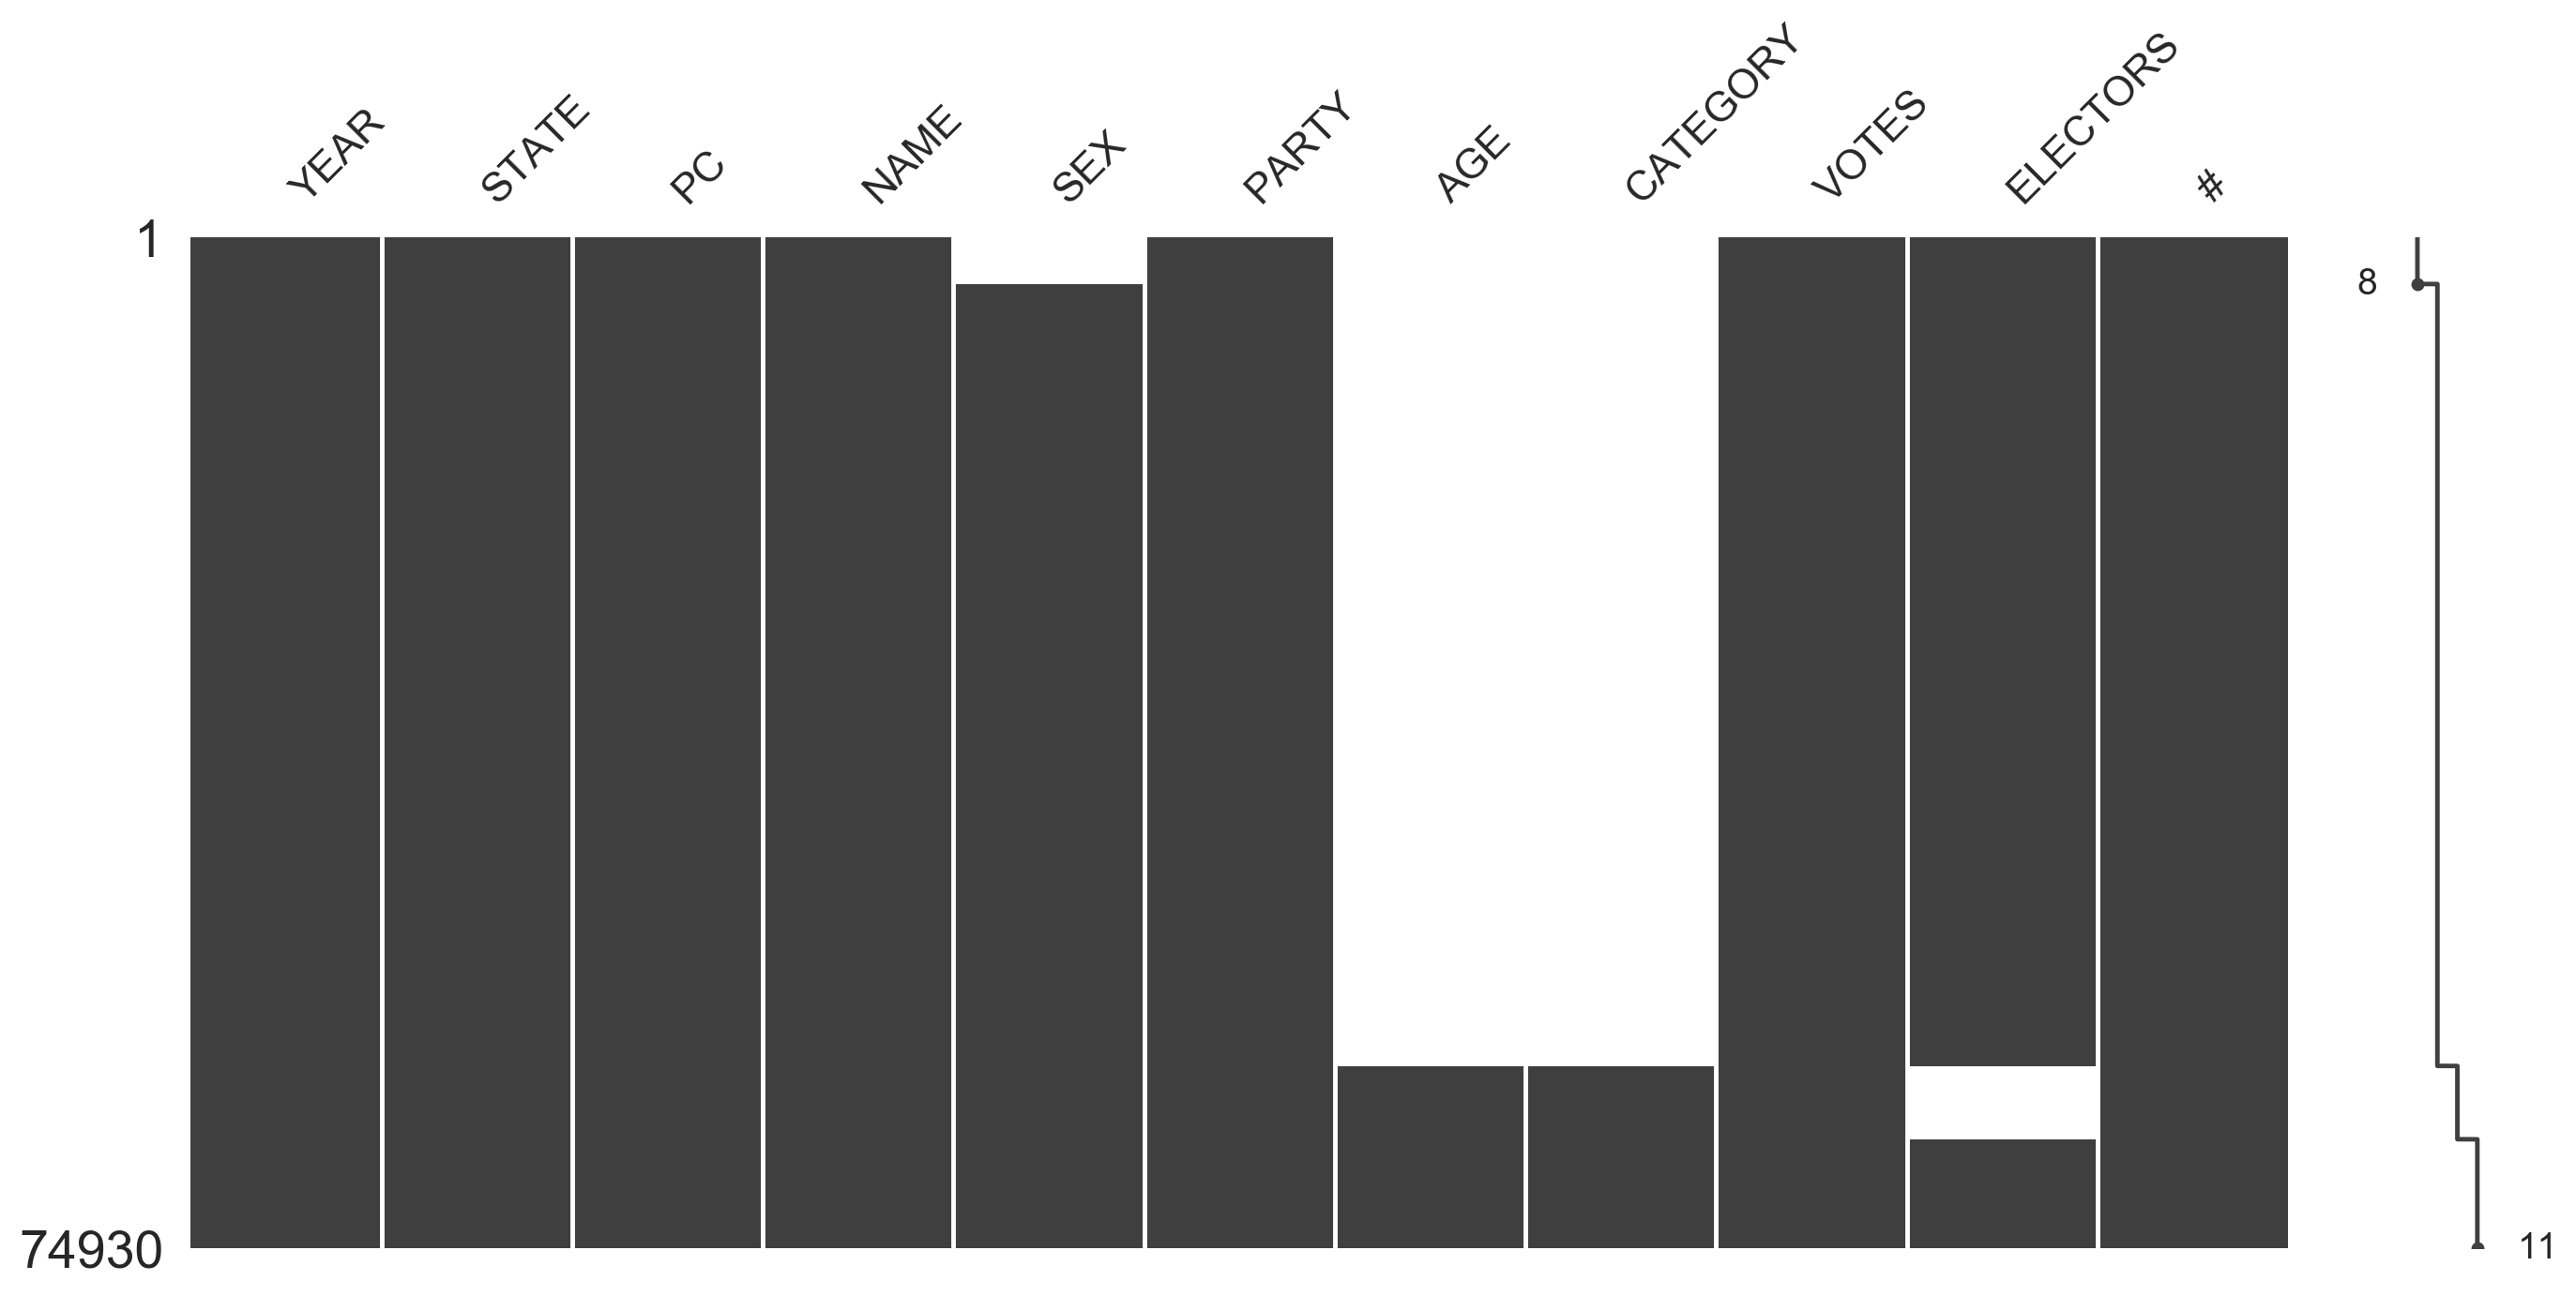

In [10]:
msno.matrix(df,
            figsize=(16, 7),
            width_ratios=(15, 1))

    Age and category data is missing for most of the dataset
    Elector count is missing for one of the recent years election data
    Sex of the candidate is missing at the start of the dataset

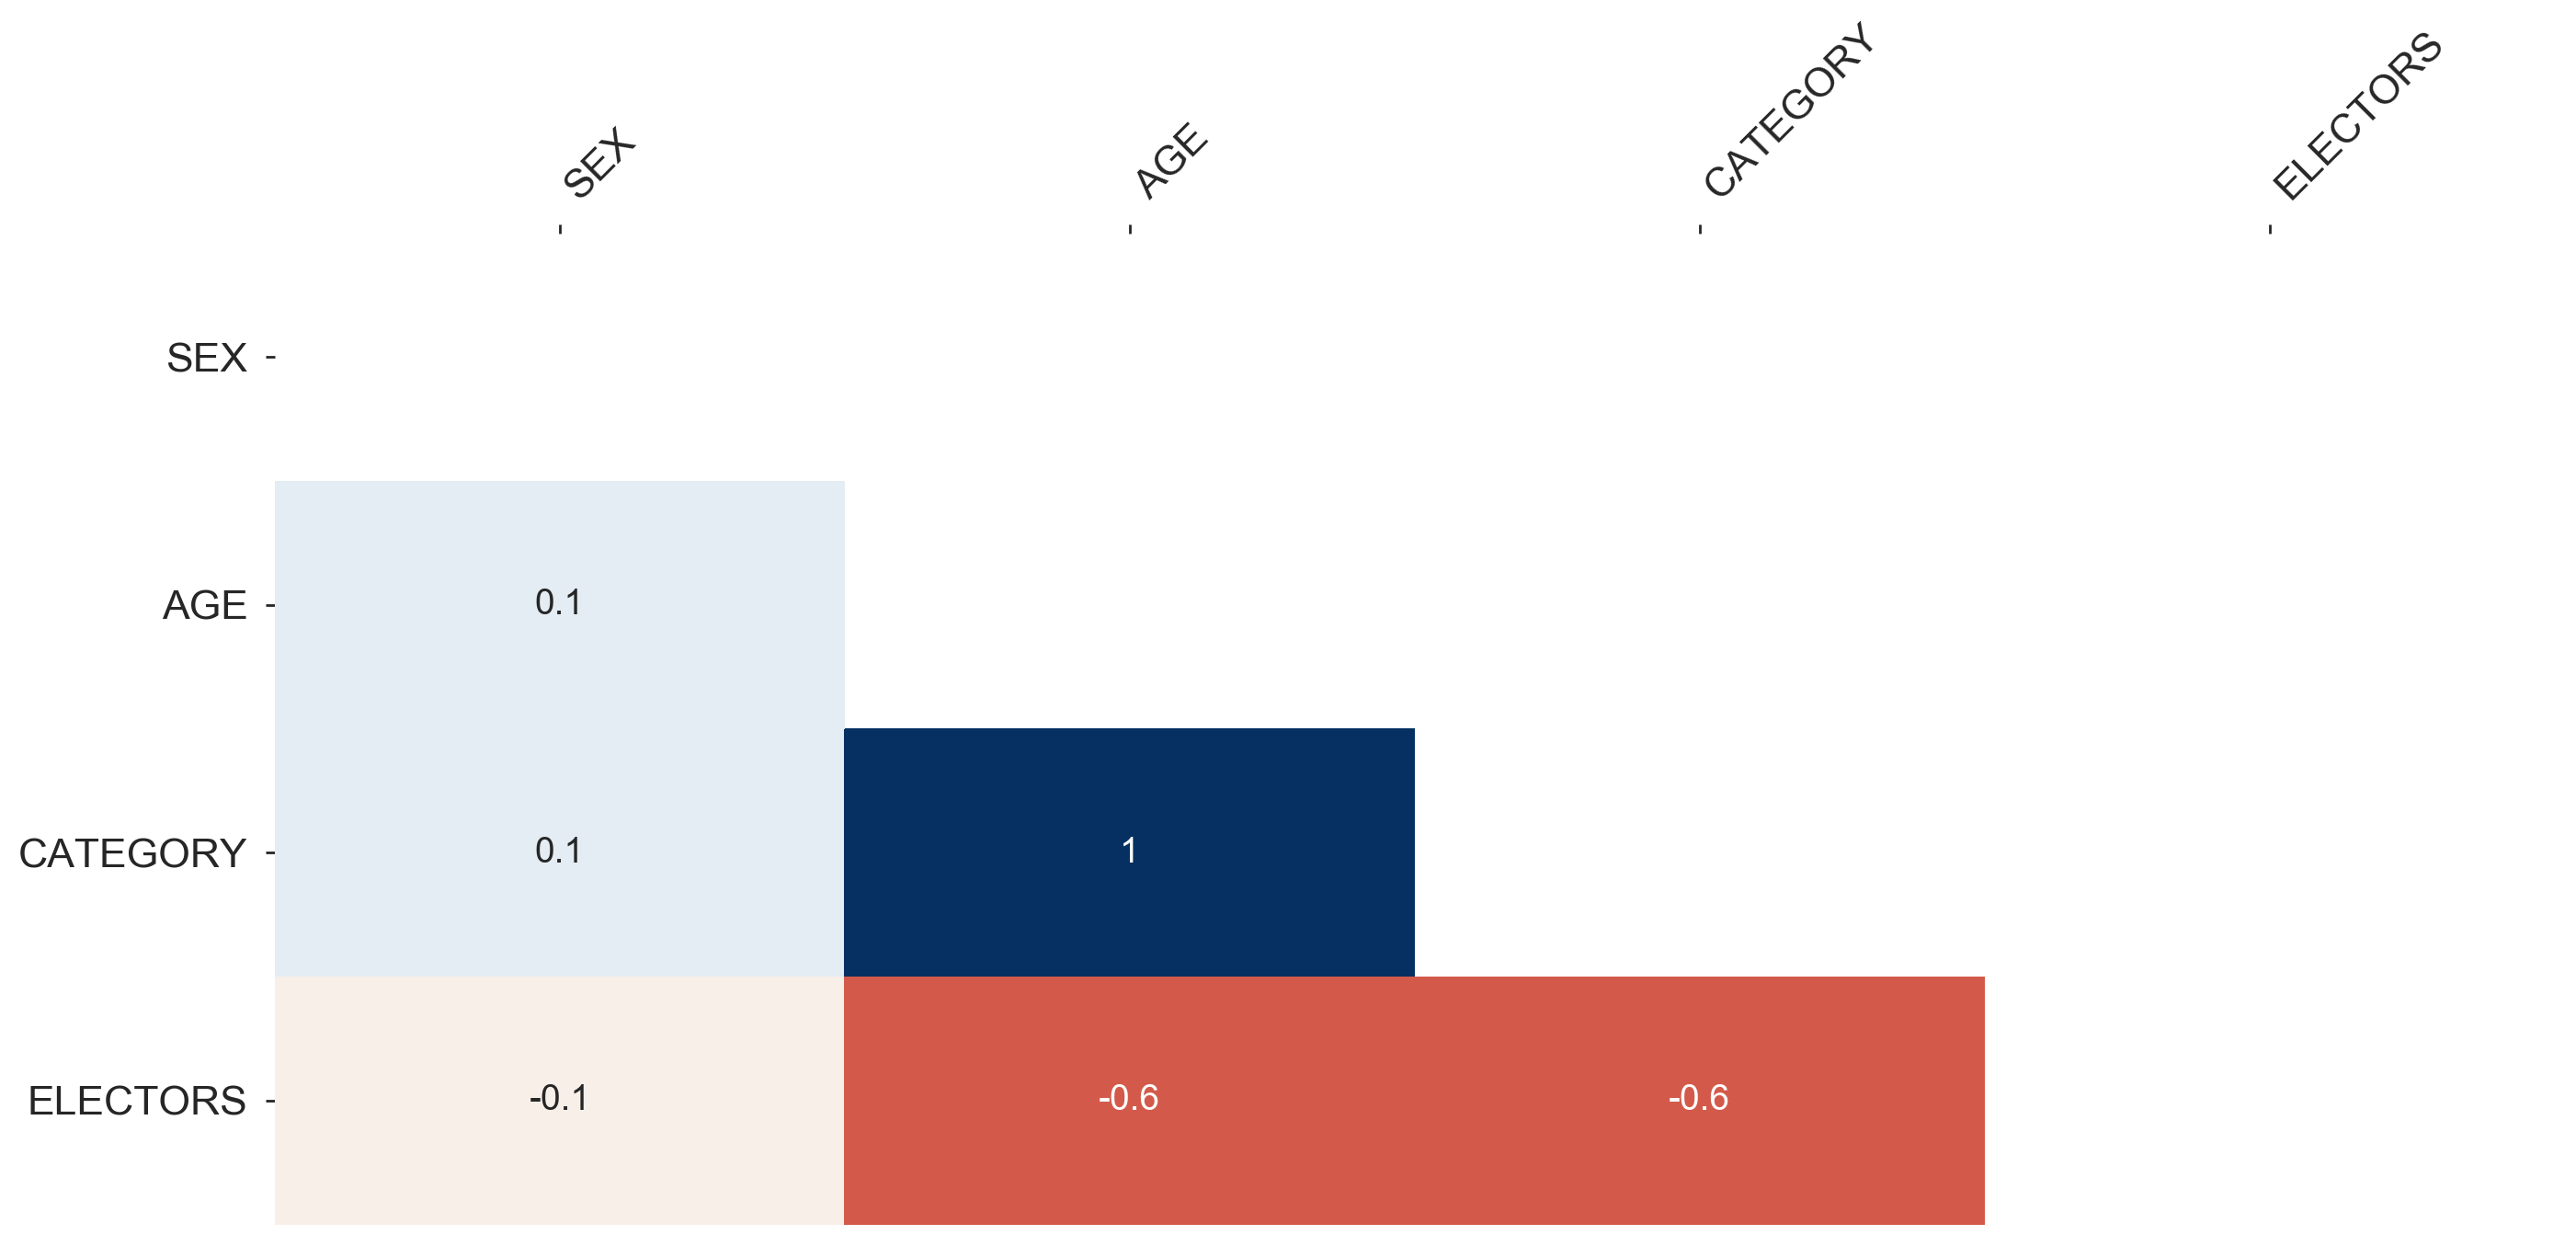

In [11]:
msno.heatmap(df.sample(7500),
            figsize=(16, 7),)

In [12]:
#check data for duplicates
df[df.duplicated(keep=False)]

,YEAR,STATE,PC,NAME,SEX,PARTY,AGE,CATEGORY,VOTES,ELECTORS,#
24572,1989,HARYANA,BHIWANI,ISHWAR,M,IND,NaN,NaN,57,944629.0,84
24574,1989,HARYANA,BHIWANI,ISHWAR,M,IND,NaN,NaN,57,944629.0,84


In [13]:
#drop the duplicate data
df.drop_duplicates()

,YEAR,STATE,PC,NAME,SEX,PARTY,AGE,CATEGORY,VOTES,ELECTORS,#
0,1951,AJMER,AJMER NORTH,JAWALA PRASHAD,NaN,INC,NaN,NaN,46679,162327.0,1
1,1951,AJMER,AJMER NORTH,CHAND KARAN,NaN,BJS,NaN,NaN,28990,162327.0,2
2,1951,AJMER,AJMER NORTH,DINO MAL,NaN,PURP,NaN,NaN,10778,162327.0,3
3,1951,AJMER,AJMER NORTH,BAJORIA BADRIDAS,NaN,IND,NaN,NaN,6153,162327.0,4
4,1951,AJMER,AJMER NORTH,RANG RAJ MEHTA,NaN,IND,NaN,NaN,4565,162327.0,5
5,1951,AJMER,AJMER SOUTH,MUKAT BEHARI LAL,NaN,INC,NaN,NaN,43082,167157.0,1
6,1951,AJMER,AJMER SOUTH,KUMARANAND,NaN,CPI,NaN,NaN,25128,167157.0,2
7,1951,AJMER,AJMER SOUTH,MADAN SINGH,NaN,RRP,NaN,NaN,13624,167157.0,3
8,1951,ASSAM,AUTONOMOUS DISTS,BONILY KHONGMEN,NaN,INC,NaN,NaN,59326,360630.0,1
9,1951,ASSAM,AUTONOMOUS DISTS,WILSON READE,NaN,KJD,NaN,NaN,32987,360630.0,2


In [14]:
df.groupby(['YEAR'])['STATE','PC'].nunique()

,STATE,PC
YEAR,,
1951,26,398
1957,17,401
1962,18,491
1967,27,516
1971,27,514
1977,31,538
1980,31,525
1984,28,510
1985,2,27


In [15]:
#How many people voted each year
df.groupby('YEAR')['VOTES'].sum()

YEAR
1951    105950083
1957    120513915
1962    115168890
1967    145866510
1971    146602276
1977    188917504
1980    197824274
1984    235184209
1985     14401125
1989    300776423
1991    275206990
1992      3016397
1996    334873286
1998    368376700
1999    364437294
2004    389779784
2009    417159281
Name: VOTES, dtype: int64

In [16]:
#total number of electors each year
len(list(df[df['#']==1].groupby(['YEAR'])['ELECTORS'].sum()))

17

In [17]:
#total number of votes each year
len(list(df.groupby('YEAR')['VOTES'].sum()))

17

In [18]:
#total number of unique years
len(list(df['YEAR'].unique()))

17

In [19]:
winners = df[df["#"]==1].drop("#",axis=1).reset_index(drop=True)
runners = df[df["#"]==2].drop(["#","ELECTORS"],axis=1).reset_index(drop=True)

In [20]:
pc_data = winners.merge(runners,how="inner",on=['YEAR','STATE','PC'],suffixes=('_w','_r'))
pc_data['MARGIN']=pc_data['VOTES_w']-pc_data['VOTES_r']

In [21]:
len(list(pc_data.groupby('YEAR')['MARGIN'].sum()))

17

In [23]:
type(df.groupby(['YEAR','PARTY'])['PC'].nunique())
df.groupby(['YEAR','PARTY'])['PC'].nunique()

YEAR  PARTY  
1951  AMN          2
      APP          1
      BJS         83
      BPI          1
      CNSPJP       6
      CP           1
      CPI         47
      CWL          3
      DCL          1
      FBL(MG)     21
      FBL(RG)      6
      GP           8
      GSS          1
      HMS         31
      HPP          1
      HR           1
      HSPP         1
      INC        392
      IND        281
      JHP          5
      JUSP         1
      KJD          1
      KJSP         1
      KKP          3
      KLP         26
      KMM          1
      KMPP       131
      KNA          1
      KSP          1
      LSS          2
                ... 
2009  SSD          7
      STBP         4
      STPI         2
      SUSP         1
      SVPP         2
      SVRP         1
      SVSP         3
      SWJP         6
      SWP          1
      SWPI         1
      TDP         31
      THPI         5
      TPPP        10
      TRS          9
      UCPI         1
      UDP          1

In [24]:
party_counts = pd.pivot_table(df,values=['PC'],index=['YEAR'],
               columns=['PARTY'],aggfunc='count',).fillna(0)
party_counts

PC                                                        ...        \
PARTY   AB ABAS ABBNS  ABBP ABCD(A) ABDBM ABDD ABDUP ABGLP ABGMKP ...   VVS   
YEAR                                                              ...         
1951   0.0  0.0   0.0   0.0     0.0   0.0  0.0   0.0   0.0    0.0 ...   0.0   
1957   0.0  0.0   0.0   0.0     0.0   0.0  0.0   0.0   0.0    0.0 ...   0.0   
1962   0.0  0.0   0.0   0.0     0.0   0.0  0.0   0.0   0.0    0.0 ...   0.0   
1967   0.0  0.0   0.0   0.0     0.0   0.0  0.0   0.0   0.0    0.0 ...   0.0   
1971   0.0  0.0   0.0   0.0     0.0   0.0  0.0   0.0   0.0    0.0 ...   0.0   
1977   0.0  0.0   0.0   0.0     0.0   0.0  0.0   0.0   0.0    0.0 ...   0.0   
1980   0.0  0.0   0.0   0.0     0.0   0.0  0.0   0.0   0.0    0.0 ...   0.0   
1984   0.0  0.0   0.0   0.0     0.0   0.0  0.0   0.0   0.0    0.0 ...   0.0   
1985   0.0  0.0   0.0   0.0     0.0   0.0  0.0   0.0   0.0    0.0 ...   0.0   
1989   0.0  0.0   0.0   0.0     0.0   0.0  0.0   0.0   0.0    0.0 ...   0.0   
1991   0.0  0.0   0.0   0.0     0.0   0.0  0.0   0.0   0.0    0.0 ...   0.0   
1992   0.0  0.0   0.0   0.0     0.0   0.0  0.0   0.0   0.0    0.0 ...   0.0   
1996   0.0  0.0   6.0  12.0     0.0   2.0  3.0   2.0   0.0    0.0 ...   0.0   
1998   0.0  2.0   2.0   2.0     0.0   0.0  0.0   0.0   1.0    2.0 ...   0.0   
1999   0.0  0.0   0.0   3.0     0.0   0.0  0.0   0.0   0.0    0.0 ...   0.0   
2004   1.0  0.0   0.0   0.0     2.0   1.0  0.0   0.0   0.0    0.0 ...   0.0   
2009   0.0  6.0   0.0   0.0     4.0   2.0  0.0   0.0   0.0    0.0 ...   1.0   

                                                         
PARTY WBS(BM)  WBTC  WPI   WT  YFE  YGP  YSP   YVP   ZP  
YEAR                                                     
1951      0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  5.0  
1957      0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
1962      0.0   0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  
1967      0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
1971      0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
1977      0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
1980      0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
1984      0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
1985      0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
1989      2.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
1991      0.0   0.0  1.0  0.0  0.0  0.0  0.0  11.0  0.0  
1992      0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
1996      0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
1998      0.0  29.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
1999      0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
2004      0.0   0.0  0.0  0.0  0.0  1.0  1.0   0.0  0.0  
2009      0.0   0.0  0.0  0.0  1.0  0.0  1.0   3.0  0.0  

[17 rows x 881 columns]

In [25]:
pc_data['VOTES%_w'] = ((pc_data['VOTES_w']/pc_data['ELECTORS'])*100).round(2)
pc_data['VOTES%_r'] = ((pc_data['VOTES_r']/pc_data['ELECTORS'])*100).round(2)
pc_data['MARGIN%'] = ((pc_data['MARGIN']/pc_data['ELECTORS'])*100).round(2)
pc_data

,YEAR,STATE,PC,NAME_w,SEX_w,PARTY_w,AGE_w,CATEGORY_w,VOTES_w,ELECTORS,NAME_r,SEX_r,PARTY_r,AGE_r,CATEGORY_r,VOTES_r,MARGIN,VOTES%_w,VOTES%_r,MARGIN%
0,1951,AJMER,AJMER NORTH,JAWALA PRASHAD,NaN,INC,NaN,NaN,46679,162327.0,CHAND KARAN,NaN,BJS,NaN,NaN,28990,17689,28.76,17.86,10.90
1,1951,AJMER,AJMER SOUTH,MUKAT BEHARI LAL,NaN,INC,NaN,NaN,43082,167157.0,KUMARANAND,NaN,CPI,NaN,NaN,25128,17954,25.77,15.03,10.74
2,1951,ASSAM,AUTONOMOUS DISTS,BONILY KHONGMEN,NaN,INC,NaN,NaN,59326,360630.0,WILSON READE,NaN,KJD,NaN,NaN,32987,26339,16.45,9.15,7.30
3,1951,ASSAM,BARPETA,BELIRAM DAS,NaN,INC,NaN,NaN,76293,332791.0,BIPIN PAL DAS,NaN,SP,NaN,NaN,63950,12343,22.93,19.22,3.71
4,1951,ASSAM,CACHAR LUSHAL HILLS,"LASKAR, NIBARAN CHANDRA",NaN,INC,NaN,NaN,192847,658171.0,"DEB, SURESH CHANDRA",NaN,INC,NaN,NaN,182692,10155,29.30,27.76,1.54
5,1951,ASSAM,DARRANG,KAMAKHYA PRASAD TRIPATHI,NaN,INC,NaN,NaN,81775,310934.0,H. C. BARUA,NaN,SP,NaN,NaN,47298,34477,26.30,15.21,11.09
6,1951,ASSAM,DIBRUGARH,"HAZARIKA, JOGENDRA NATH",NaN,INC,NaN,NaN,93554,347258.0,"SONOWAL, PARASURAM",NaN,SP,NaN,NaN,22844,70710,26.94,6.58,20.36
7,1951,ASSAM,GAUHATI,ROHINI KUMAR CHAUDHURY,NaN,INC,NaN,NaN,96122,360331.0,LAKSHYA DHAR CHAUDHURY,NaN,SP,NaN,NaN,72553,23569,26.68,20.14,6.54
8,1951,ASSAM,GOALPARA GARO HILLS,JONAB AMJAD ALI,NaN,SP,NaN,NaN,182093,719456.0,SITANATH BRAHMA CHOWDHURY,NaN,INC,NaN,NaN,165144,16949,25.31,22.95,2.36
9,1951,ASSAM,GOLAGHAT JORHAT,DEBESWAR SARMA,NaN,INC,NaN,NaN,93002,363384.0,BHABESH CHANDRA BARUA,NaN,SP,NaN,NaN,42327,50675,25.59,11.65,13.95
